In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
#Herunterladen der Trainings- und Testdaten
(XTrain, yTrain), (XTest, yTest) = mnist.load_data()

In [3]:
XTrain[0].shape

(28, 28)

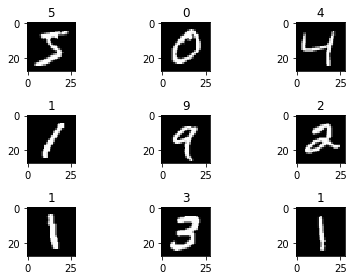

In [4]:
#Figur zur Veranschaulichung
fig = plt.figure()
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(XTrain[i], cmap='gray', interpolation='none')
    ax.set_title(yTrain[i])
plt.tight_layout()
plt.savefig("NumbersExample.png")

In [5]:
XTrain.shape

(60000, 28, 28)

In [6]:
#2D --> 1D
XTrain = XTrain.reshape(60000, 784)
XTest = XTest.reshape(10000, 784)

In [7]:
XTrain.shape

(60000, 784)

In [8]:
XTrain[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
#Werte zwischen 0 und 1
XTrain = XTrain/255
XTest = XTest/255

In [10]:
XTrain[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
#10 binäre Ausganswerte
YTrain = np_utils.to_categorical(yTrain, 10)
YTest = np_utils.to_categorical(yTest, 10)

In [12]:
print(yTrain[0])
print("↓")
print(YTrain[0])

5
↓
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
#Erstellung des Netzes
myANN = Sequential() #Konstruktor

#Dense fügt Layer hinzu --> (Anzahl Neurone, (Input-Layer), Aktivierungsfunktion, Lay)

myANN.add(Dense(80, input_dim=784, activation='relu', name='FC-Layer_1'))
myANN.add(Dense(40, activation='relu', name='FC-Layer_2'))
myANN.add(Dense(10, activation='sigmoid', name='Output_Layer'))

print(myANN.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC-Layer_1 (Dense)           (None, 80)                62800     
_________________________________________________________________
FC-Layer_2 (Dense)           (None, 40)                3240      
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                410       
Total params: 66,450
Trainable params: 66,450
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
#Kompilieren
myANN.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#compile(Fehlerfunktion, Optimierungsalgorithmus, zusätzliche berechnung der accuracy/Genauigkeit)

In [15]:
#Trainieren
history = myANN.fit(XTrain, YTrain, batch_size=24, epochs=10, verbose=True)
#fit(Bilder, Labels, "Number of samples per gradient update", Darstellung des Trainings)

Epoch 1/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0172 - accuracy: 0.8999
Epoch 2/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0067 - accuracy: 0.9612
Epoch 3/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0051 - accuracy: 0.9702
Epoch 4/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0041 - accuracy: 0.9770
Epoch 5/10
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0034 - accuracy: 0.9812
Epoch 6/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0030 - accuracy: 0.9836
Epoch 7/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0026 - accuracy: 0.9858
Epoch 8/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0023 - accuracy: 0.9870:  - ETA: 0s - loss: 0.0 - ETA: 0s - loss: 0.0023 - accuracy: 0.98
Epoch 9/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0021 - accuracy: 0.9886: 0s - loss: 0.00

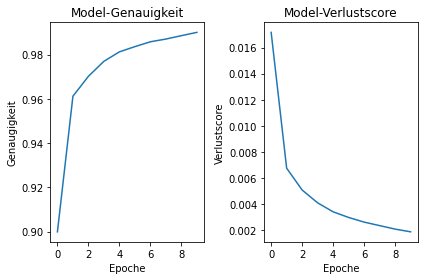

In [16]:
#Plot zur Veränderung der Genauigkeit
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Model-Genauigkeit')
plt.ylabel('Genaugigkeit')
plt.xlabel('Epoche')

#Plot zur Veränderung der Verlustscores
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Model-Verlustscore')
plt.ylabel('Verlustscore')
plt.xlabel('Epoche')

plt.tight_layout()

In [17]:
#Testen
score = myANN.evaluate(XTest, YTest, verbose=False)
print('Test Verlustscore: ', score[0])
print('Test Genauigkeit:', score[1])

Test Verlustscore:  0.003940706606954336
Test Genauigkeit: 0.9765999913215637


In [18]:
from sklearn.metrics import roc_curve, auc
y_score = myANN.predict(XTest)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(YTest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [19]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

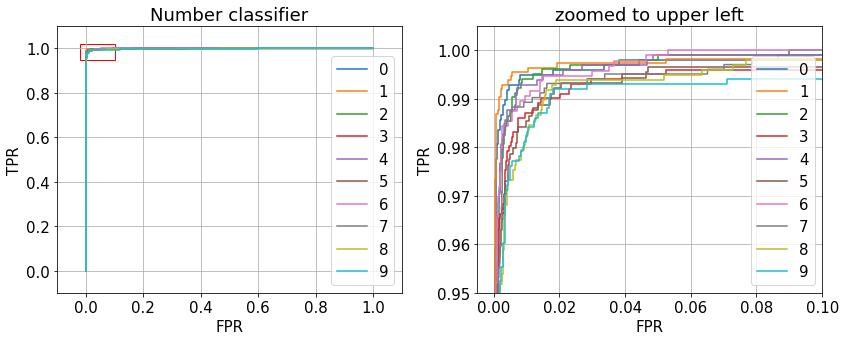

In [31]:
import matplotlib.patches as patches

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
for i in range(10):
    ax1.plot(fpr[i], tpr[i], label = i)
    
ax1.add_patch(
    patches.Rectangle(
        (-0.02, 0.95),
        0.12, 0.07,
        edgecolor = 'red', fill = False
    )
)    

ax1.legend(loc="lower right")
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.set_title('Number classifier')
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
for i in range(10):
    ax2.plot(fpr[i], tpr[i], label = i)
ax2.set_xlim(-0.005, 0.1)
ax2.set_ylim(0.95, 1.005)
ax2.legend(loc="lower right")
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.set_title('zoomed to upper left')
plt.grid()

plt.tight_layout()

plt.savefig("numbers_roc.png")